<a href="https://colab.research.google.com/github/iceman67/-Python/blob/master/pandas_tutorial_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### pandas
* 구조화된 데이터의 처리를 지원하여 데이터분석 및 가공에 사용되는 파이썬 라이브러리
* 엑셀과 유사한 파이썬 라이브러리
* 고성능 배열 계산 라이브러리인 numpy와 통합하여 스프레드시트 처리 기능을 제공 
* 인덱싱, 연산용 함수, 전처리 함수 등을 제공 

Series는 엑셀에서 한개 열(column)과 같는 1차원 리스트와 같은 구조임 

#### 시리즈 생성 

In [ ]:
import pandas as pd

In [ ]:
series = pd.Series([1,2,3,4,5])
# 왼쪽에는 Series의 인덱스(index)를, 오른쪽은 값(value)를 보여줘요

series

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [ ]:
# values는 값을 출력함
series.values

array([1, 2, 3, 4, 5])

In [ ]:
# Index를 출력함
series.index

RangeIndex(start=0, stop=5, step=1)

 값의 개수를 출력해줍니다 (빈도수를 얻기 위해 사용함)

In [ ]:
series.value_counts()

5    1
4    1
3    1
2    1
1    1
dtype: int64

(따라하기) 시리즈 사용하기 

In [ ]:
students = [ 'Alice', 'Bob', 'Charles']

In [ ]:
pd.Series(students)

0      Alice
1        Bob
2    Charles
dtype: object

In [ ]:
numbers = [1,2,3]
pd.Series(numbers)

0    1
1    2
2    3
dtype: int64

In [ ]:
# append 함수를 이용하여 값을 추가할수도 있어요. 이때 값은 Series 형태의 값만 추가가 가능합니다
series = series.append(pd.Series([6, 7]))
series

0    1
1    2
2    3
3    4
4    5
0    6
1    7
dtype: int64

In [ ]:
# 값을 추가하니 인덱스 재구성 필요, reindex 함수를 통해 재정의할 수 있어요
series = series.reset_index(drop=True)
series

0    1
1    2
2    3
3    4
4    5
5    6
6    7
dtype: int64

In [ ]:
series[1]=100
series

0      1
1    100
2      3
3      4
4      5
5      6
6      7
dtype: int64

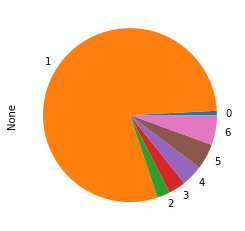

In [ ]:
import matplotlib.pyplot as plt
series.plot(kind='pie')

In [ ]:
students = [ 'Alice', 'Bob', None]

In [ ]:
pd.Series(students)

0    Alice
1      Bob
2     None
dtype: object

In [ ]:
numbers = [1,2,None]
pd.Series(numbers)

0    1.0
1    2.0
2    NaN
dtype: float64

In [ ]:
import numpy as np

np.isnan (np.nan)

True

In [ ]:
students_scores = { 'Alice' :'physics', 'Bob' : 'Chemistry', 'Charles': 'English' }
s = pd.Series(students_scores)

In [ ]:
s.index

Index(['Alice', 'Bob', 'Charles'], dtype='object')

In [ ]:
students = [ ('Alice', 'white'),  ('Bob', 'green'), ('Charles', 'red')]

In [ ]:
pd.Series(students)

0    (Alice, white)
1      (Bob, green)
2    (Charles, red)
dtype: object

In [ ]:
s = pd.Series( ['physics', 'Chemistry',  'English'], index= [ 'Alice', 'Bob', 'Charles' ])

In [ ]:
s

Alice        physics
Bob        Chemistry
Charles      English
dtype: object

#### 시리즈 질의

In [ ]:
s.iloc[1]

'Chemistry'

In [ ]:
s.loc['Alice']

'physics'

Series 에서 특정값을 접근함 

In [ ]:
s[2]

'English'

In [ ]:
grades = [50, 60, 70, 80, 65]
grades

[50, 60, 70, 80, 65]

In [ ]:
# 안에 조건식도 올 수 있어요
grades = pd.Series(grades)

pass_grades = grades[grades > 60]
pass_grades

2    70
3    80
4    65
dtype: int64

In [ ]:
total = 0 
for g in grades:
  total = total + g

print (total/len(grades))

65.0


In [ ]:
import numpy as np

total = np.sum(grades)
print (total/len(grades))

65.0


In [ ]:
numbers = pd.Series(np.random.randint(0, 1000, 10000))

In [ ]:
numbers.head()

0    138
1    731
2    161
3    529
4    678
dtype: int64

In [ ]:
%%timeit -n 100 

total = 0 
for g in numbers:
  total = total + g

total/len(numbers)
#print (total/len(numbers))

100 loops, best of 5: 1.38 ms per loop


In [ ]:
%%timeit -n 100 

total = np.sum(numbers)
total/len(numbers)
#print (total/len(numbers))

100 loops, best of 5: 69.1 µs per loop


#### DataFrame 이해하기

테이블 형식의 데이터 (tabular, rectangular grid 등으로 불림)를 다룰 때 사용


In [4]:
import numpy as np
import pandas as pd

darray = np.array([[1, 2, 3], [4, 5, 6]])
df = pd.DataFrame(darray)
df


,0,1,2
0,1,2,3
1,4,5,6


In [5]:
df = pd.DataFrame(np.array([[1, 2, 3], [4, 5, 6]]))

# Use the `shape` property
print(df.shape)

# Or use the `len()` function with the `index` property
print(len(df.index))


(2, 3)
2


2차원의 자료구조

In [6]:
import pandas as pd

data = {
  "calories": [420, 380, 390],
  "duration": [50, 40, 45]
}

#load data into a DataFrame object:
df = pd.DataFrame(data)

print(df) 

   calories  duration
0       420        50
1       380        40
2       390        45


In [7]:
# 첫번째 row의 값
print(df.loc[0])

calories    420
duration     50
Name: 0, dtype: int64


In [8]:
# 첫번째와 두번쨰 row의 값
print(df.loc[[0, 1]])


   calories  duration
0       420        50
1       380        40


In [10]:
data = {
    "도시": ["서울", "서울", "서울", "부산", "부산", "부산", "인천", "인천"],
    "연도": ["2015", "2010", "2005", "2015", "2010", "2005", "2015", "2010"],
    "인구": [9904312, 9631482, 9762546, 3448737, 3393191, 3512547, 2890451, 263203],
    "지역": ["수도권", "수도권", "수도권", "경상권", "경상권", "경상권", "수도권", "수도권"]
}
columns = ["도시", "연도", "인구", "지역"]
df = pd.DataFrame(data, columns=columns)
df

,도시,연도,인구,지역
0,서울,2015,9904312,수도권
1,서울,2010,9631482,수도권
2,서울,2005,9762546,수도권
3,부산,2015,3448737,경상권
4,부산,2010,3393191,경상권
5,부산,2005,3512547,경상권
6,인천,2015,2890451,수도권
7,인천,2010,263203,수도권


In [11]:
# Use `loc[]` to select a column
print (df['도시'])

0    서울
1    서울
2    서울
3    부산
4    부산
5    부산
6    인천
7    인천
Name: 도시, dtype: object


In [12]:
# 첫번쨰 row값 
print(df.loc[0])


도시         서울
연도       2015
인구    9904312
지역        수도권
Name: 0, dtype: object


In [13]:
import pandas as pd

data = {
  "calories": [420, 380, 390],
  "duration": [50, 40, 45]
}

df = pd.DataFrame(data, index = ["day1", "day2", "day3"])

print(df) 

      calories  duration
day1       420        50
day2       380        40
day3       390        45


In [14]:
print(df.loc["day2"])


calories    380
duration     40
Name: day2, dtype: int64


[DataFrame 인텍스 사용하기](https://colab.research.google.com/drive/1_NtyuqeOVqicQ0Ufo1LU2-jkQcaaOB_p)


[(실습)DataFrame 인텍스 사용하기](https://colab.research.google.com/drive/1vqcN1euhJ8fK__zt3KfS0y-SS7yxTzue)

#### 실습자료

> CSV 파일을 읽어 dataframe으로 자료 처리
* [기상청 ASOS 자료 읽기](https://colab.research.google.com/drive/1ndQdKbTqq6yhgkAQ3gxtScJbw0JFH3YA)



#### groupby

* 집단, 그룹별로 데이터를 집계, 요약
* 전체 데이터를 그룹 별로 나누고 (split), 각 그룹별로 집계함수를 적용(apply) 한후, 그룹별 집계 결과를 하나로 결합(combine)



In [15]:
df = pd.DataFrame({
    'city': ['부산', '부산', '부산', '부산', '서울', '서울', '서울'],
    'fruits': ['apple', 'orange', 'banana', 'banana', 'apple', 'apple', 'banana'],
    'price': [100, 200, 250, 300, 150, 200, 400],
    'quantity': [1, 2, 3, 4, 5, 6, 7]
})
df

,city,fruits,price,quantity
0,부산,apple,100,1
1,부산,orange,200,2
2,부산,banana,250,3
3,부산,banana,300,4
4,서울,apple,150,5
5,서울,apple,200,6
6,서울,banana,400,7


In [16]:
# groupby를 사용하여 같은 값을 하나로 묶어 통계 또는 집계 결과를 얻음

df.groupby('city').mean()


,price,quantity
city,,
부산,212.5,2.5
서울,250.0,6.0


In [17]:
# 그룹 지정은 여러 필드를 사용하여 지정
# 도시(city)와 과일(fruits)로 평균
df.groupby(['city', 'fruits']).mean()


price  quantity
city fruits                 
부산   apple   100.0       1.0
     banana  275.0       3.5
     orange  200.0       2.0
서울   apple   175.0       5.5
     banana  400.0       7.0

In [18]:
#groupby를 사용하면 기본으로 그룹 라벨이 index로 지정됨
#index를 사용하고 싶은 않은 경우에는 as_index=False 를 설정

df.groupby(['city', 'fruits'], as_index=False).mean()


,city,fruits,price,quantity
0,부산,apple,100.0,1.0
1,부산,banana,275.0,3.5
2,부산,orange,200.0,2.0
3,서울,apple,175.0,5.5
4,서울,banana,400.0,7.0


In [19]:
# 그룹 안에 데이터를 확인
df.groupby('city').get_group('부산')


,city,fruits,price,quantity
0,부산,apple,100,1
1,부산,orange,200,2
2,부산,banana,250,3
3,부산,banana,300,4


In [20]:
# 각 그룹의 크기를 얻음
df.groupby('city').size()

city
부산    4
서울    3
dtype: int64

In [21]:
# 그룹별로 결과를 얻는 통계값으로 통합함
cityDf = df.groupby('city').agg(np.mean)
cityDf

,price,quantity
city,,
부산,212.5,2.5
서울,250.0,6.0


In [22]:
#가격의 평균과 수량의 합계를 얻음
def my_mean(s):
    return np.mean(s)

df.groupby('city').agg({'price': my_mean, 'quantity': np.sum})

,price,quantity
city,,
부산,212.5,10
서울,250.0,18


In [23]:
df.groupby(['city', 'fruits'], as_index=False).apply(lambda d: (d.price * d.quantity).sum())

,city,fruits,NaN
0,부산,apple,100
1,부산,banana,1950
2,부산,orange,400
3,서울,apple,1950
4,서울,banana,2800


In [24]:
def total_series(d):
    return d.price * d.quantity

df.groupby(['city', 'fruits']).apply(total_series)

city  fruits   
부산    apple   0     100
      banana  2     750
              3    1200
      orange  1     400
서울    apple   4     750
              5    1200
      banana  6    2800
dtype: int64

In [25]:
def total_keepindex(d):
    return pd.DataFrame({
        'total': d.price * d.quantity # 여기서 반환된 DataFrame row index와 d의 row index는 같음
})

df.groupby(['city', 'fruits']).apply(total_keepindex)

,total
0,100
1,400
2,750
3,1200
4,750
5,1200
6,2800


In [26]:
def total_keepnoindex(d):
    return pd.DataFrame({
        'total': (d.price * d.quantity).sum()
    }, index=['hoge'])
df.groupby(['city', 'fruits']).apply(total_keepnoindex)

total
city fruits            
부산   apple  hoge    100
     banana hoge   1950
     orange hoge    400
서울   apple  hoge   1950
     banana hoge   2800

센서데이터 처리 
> [자료그룹핑](https://colab.research.google.com/drive/15s1NfRNYvsjHgvvV3mwLnY2HFof9KxgY#scrollTo=WS6FSDwPqVZX)

#### Pandas를 사용한 데이터 처리 
* 
[날짜 기준 자료 통합](https://colab.research.google.com/drive/16wgKbp4k0FM9gK3Ydpqmp0XN29QDGyb8)
* 
[Movie Trend](https://colab.research.google.com/drive/1FVYnvaX5313Ru-H-m-wvEEiZ5zh2iyFl)

* [데이터처리, 피봇테이블](https://colab.research.google.com/drive/1PMYgpvmRakoLR7Kf8z4fnE2-7A4eLEKG)

* [Walk through Pandas](https://colab.research.google.com/drive/1W56pypWcWezGh56AZfPsiE642ItonG5c#scrollTo=SRezquNJZrXF)

* 
[IMDB](https://colab.research.google.com/drive/1sBSSavSMBjpWB6ARbjiKnP8xLorfiSUt)
